In [1]:
import tensorflow as tf
import numpy as np
import pickle
np.random.seed(7)

In [2]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\input_layer_4_6_16_2.pickle','rb') as file:
    input_data = pickle.load(file)
permutation = list(np.random.permutation(input_data.shape[0]))
input_data = input_data[permutation,:]
print(input_data.shape)
x_train = input_data[:100000, :]
x_test = input_data[100000:105000, :]


(105000, 24)


In [3]:
with open ('C:\\Users\\Wilfred\\Desktop\\better-of-two\\output_layer_4_6_16_2.pickle','rb') as file:
    output_data = pickle.load(file)
print(output_data.shape)
#output_data = np.transpose(output_data)
output_data = output_data[permutation,:]
y_train = output_data[:100000, :]
y_test = output_data[100000:105000, :]
print(output_data.shape)

(105000, 12)
(105000, 12)


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(150, input_shape = [24], activation = 'relu'),
    #tf.keras.layers.Dense(200, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(150, activation = 'relu'),
    tf.keras.layers.Dense(12, activation = 'sigmoid')
])
adam = tf.keras.optimizers.Adam(lr = 0.0035)
model.compile(optimizer = adam, loss = 'binary_crossentropy', metrics = ['accuracy'])

history = model.fit(x_train, y_train, batch_size = 1024, epochs = 150, verbose = 2, validation_data = (x_test, y_test))


Train on 100000 samples, validate on 5000 samples
Epoch 1/150
100000/100000 - 3s - loss: 0.3850 - accuracy: 0.8386 - val_loss: 0.3163 - val_accuracy: 0.8581
Epoch 2/150
100000/100000 - 2s - loss: 0.2827 - accuracy: 0.8742 - val_loss: 0.2637 - val_accuracy: 0.8828
Epoch 3/150
100000/100000 - 2s - loss: 0.2430 - accuracy: 0.8918 - val_loss: 0.2299 - val_accuracy: 0.8978
Epoch 4/150
100000/100000 - 2s - loss: 0.2146 - accuracy: 0.9043 - val_loss: 0.2099 - val_accuracy: 0.9067
Epoch 5/150
100000/100000 - 2s - loss: 0.1980 - accuracy: 0.9108 - val_loss: 0.1991 - val_accuracy: 0.9111
Epoch 6/150
100000/100000 - 2s - loss: 0.1887 - accuracy: 0.9152 - val_loss: 0.1910 - val_accuracy: 0.9141
Epoch 7/150
100000/100000 - 2s - loss: 0.1797 - accuracy: 0.9197 - val_loss: 0.1844 - val_accuracy: 0.9173
Epoch 8/150
100000/100000 - 2s - loss: 0.1741 - accuracy: 0.9223 - val_loss: 0.1781 - val_accuracy: 0.9217
Epoch 9/150
100000/100000 - 2s - loss: 0.1683 - accuracy: 0.9256 - val_loss: 0.1770 - val_accu

Epoch 77/150
100000/100000 - 2s - loss: 0.0371 - accuracy: 0.9853 - val_loss: 0.0726 - val_accuracy: 0.9766
Epoch 78/150
100000/100000 - 2s - loss: 0.0367 - accuracy: 0.9856 - val_loss: 0.0713 - val_accuracy: 0.9766
Epoch 79/150
100000/100000 - 2s - loss: 0.0359 - accuracy: 0.9860 - val_loss: 0.0830 - val_accuracy: 0.9733
Epoch 80/150
100000/100000 - 2s - loss: 0.0382 - accuracy: 0.9848 - val_loss: 0.0714 - val_accuracy: 0.9766
Epoch 81/150
100000/100000 - 2s - loss: 0.0374 - accuracy: 0.9854 - val_loss: 0.0701 - val_accuracy: 0.9782
Epoch 82/150
100000/100000 - 2s - loss: 0.0343 - accuracy: 0.9864 - val_loss: 0.0739 - val_accuracy: 0.9769
Epoch 83/150
100000/100000 - 2s - loss: 0.0360 - accuracy: 0.9858 - val_loss: 0.0733 - val_accuracy: 0.9771
Epoch 84/150
100000/100000 - 2s - loss: 0.0343 - accuracy: 0.9865 - val_loss: 0.0746 - val_accuracy: 0.9779
Epoch 85/150
100000/100000 - 2s - loss: 0.0341 - accuracy: 0.9866 - val_loss: 0.0758 - val_accuracy: 0.9773
Epoch 86/150
100000/100000 -

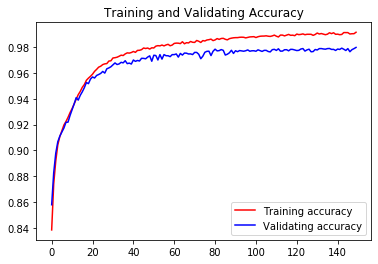

In [6]:
import matplotlib.pyplot as plt
plt.figure()
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validating accuracy')
plt.title('Training and Validating Accuracy')
#plt.title('Training Accuracy')
plt.legend()
plt.show()

In [8]:
#model.evaluate(x_test, y_test, verbose = 2)

5000/1 - 0s - loss: 0.0630 - accuracy: 0.9720


[0.04715186712741852, 0.9720002]

In [7]:
model.save('C:\\Users\\Wilfred\\Desktop\\weights\\Better_of_Two\\Better_of_Two_4_6_16_2_model.h5')